# Creating a Dollar Neutral Portfolio using the best Solver

In [2]:
#downloading Data...
#portfolio consists of 2 stocks, 1 ETF, 1 Mutual Fund, and 1 currency
import pandas_datareader as pdr
tlt = pdr.get_data_yahoo('TLT')
att = pdr.get_data_yahoo('T')
f500 = pdr.get_data_yahoo('FXAIX')
jnj = pdr.get_data_yahoo('JNJ')
usd_jpy = pdr.get_data_yahoo('JPY=X')
import pandas as pd
port = pd.DataFrame({'tlt':pd.DataFrame.reset_index(tlt).iloc[:,6], 'att':pd.DataFrame.reset_index(att).iloc[:,6],
                   'f500':pd.DataFrame.reset_index(f500).iloc[:,6],'jnj':pd.DataFrame.reset_index(jnj).iloc[:,6],
                    'usd_jpy':pd.DataFrame.reset_index(usd_jpy).iloc[:,6]})
port_ret = port.pct_change().dropna()

In [3]:
port_ret.head()

,tlt,att,f500,jnj,usd_jpy
1,0.015587,-0.009038,-0.021607,-0.019112,0.006626
2,-0.003101,0.015299,0.000454,0.005155,-0.010262
3,0.010530,-0.017676,-0.011491,-0.017949,0.003368
4,-0.006789,0.018879,0.005200,0.001984,0.001542
5,-0.003815,0.017371,0.020390,0.008443,-0.003666


In [4]:
from pyPortfolioAnalysis import *
#adding constraints and objectives in a portfolio
p1 = portfolio_spec(assets = list(port_ret.columns))
add_constraint(p1, kind = 'box', minimum = [-0.3, -0.1, 0.3, -0.1, -0.5], maximum = [0.4, 0.45, 0.6, 0.4, 0.4])
add_constraint(p1, 'dollar_neutral')
add_constraint(p1, kind = 'group', groups = {'stocks':[1,3], 'mf_etf':[0,2], 'fx':[4]},
              group_min = [-.2, 0.0, -0.5], group_max = [.7, 0.99, .4])
add_objective(p1, kind='return', name = 'mean', target = 0.0005)
add_objective(p1, kind='risk', name = 'std', target = .008)
p1.port_summary()
constraints = get_constraints(p1)
#summary method is useful to get the complete picture of the portfolio
p1.port_summary()

{'Assets': ['tlt', 'att', 'f500', 'jnj', 'usd_jpy'],
 'Number of Assets': 5,
 'category_labels': None,
 'Constraints': {'box': {'minimum': [-0.3, -0.1, 0.3, -0.1, -0.5],
   'maximum': [0.4, 0.45, 0.6, 0.4, 0.4],
   'enabled': True},
  'dollar_neutral': {'min_sum': 0, 'max_sum': 0, 'enabled': True},
  'group': {'groups': {'stocks': [1, 3], 'mf_etf': [0, 2], 'fx': [4]},
   'group_min': [-0.2, 0.0, -0.5],
   'group_max': [0.7, 0.99, 0.4],
   'group_label': ['stocks', 'mf_etf', 'fx'],
   'enabled': True}},
 'Objectives': {'return': {'target': 0.001,
   'multiplier': -1,
   'arguments': {},
   'enabled': True,
   'name': 'mean'},
  'risk': {'target': 0.008,
   'multiplier': -1,
   'arguments': {},
   'enabled': True,
   'name': 'std'}}}

In [6]:
#using the best solver among all. Default parameters are used. Feel free to change the settings and check on the best portfolio
optimize_portfolio(port_ret, p1, optimize_method = 'best')

This may take a will as it will optimize weights sequentially across all optimizers
differential_evolution step 1: f(x)= 7.92481
differential_evolution step 2: f(x)= 7.92481
differential_evolution step 3: f(x)= 7.92481
differential_evolution step 4: f(x)= 7.92481
differential_evolution step 5: f(x)= 7.92481
differential_evolution step 6: f(x)= 7.92481
differential_evolution step 7: f(x)= 7.92481
differential_evolution step 8: f(x)= 7.92481
differential_evolution step 9: f(x)= 7.92481
differential_evolution step 10: f(x)= 7.92481
differential_evolution step 11: f(x)= 7.92481
differential_evolution step 12: f(x)= 7.92481
differential_evolution step 13: f(x)= 7.92481
differential_evolution step 14: f(x)= 7.92481
differential_evolution step 15: f(x)= 7.92481
differential_evolution step 16: f(x)= 7.92481
differential_evolution step 17: f(x)= 7.92481
differential_evolution step 18: f(x)= 7.92481
differential_evolution step 19: f(x)= 7.92481
differential_evolution step 20: f(x)= 7.92481
diffe

differential_evolution step 179: f(x)= 5.74076
differential_evolution step 180: f(x)= 5.74076
differential_evolution step 181: f(x)= 5.74076
differential_evolution step 182: f(x)= 5.71716
differential_evolution step 183: f(x)= 5.71716
differential_evolution step 184: f(x)= 5.71716
differential_evolution step 185: f(x)= 5.71716
differential_evolution step 186: f(x)= 5.65991
differential_evolution step 187: f(x)= 5.65991
differential_evolution step 188: f(x)= 5.65991
differential_evolution step 189: f(x)= 5.65991
differential_evolution step 190: f(x)= 5.65991
differential_evolution step 191: f(x)= 5.65991
differential_evolution step 192: f(x)= 5.65991
differential_evolution step 193: f(x)= 5.65991
differential_evolution step 194: f(x)= 5.65991
differential_evolution step 195: f(x)= 5.65991
differential_evolution step 196: f(x)= 5.65991
differential_evolution step 197: f(x)= 5.65991
differential_evolution step 198: f(x)= 5.65991
differential_evolution step 199: f(x)= 5.65991
differential_

2021-01-13 00:23:09,177 - pyswarms.single.global_best - INFO - Optimize for 250 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|250/250, best_cost=7.24
2021-01-13 00:24:21,869 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 7.243595907896821, best pos: [-0.12  0.02  0.48  0.12 -0.5 ]


Optimization terminated successfully.
         Current function value: 6.790541
         Iterations: 111
         Function evaluations: 197
basinhopping step 0: f 7.09275
basinhopping step 1: f 7.09275 trial_f 7.62647 accepted 0  lowest_f 7.09275
basinhopping step 2: f 7.09275 trial_f 7.67326 accepted 0  lowest_f 7.09275
basinhopping step 3: f 7.55045 trial_f 7.55045 accepted 1  lowest_f 7.09275
basinhopping step 4: f 7.55045 trial_f 154.78 accepted 0  lowest_f 7.09275
basinhopping step 5: f 7.66797 trial_f 7.66797 accepted 1  lowest_f 7.09275
basinhopping step 6: f 7.66797 trial_f 21.446 accepted 0  lowest_f 7.09275
basinhopping step 7: f 7.66797 trial_f 46.7705 accepted 0  lowest_f 7.09275
basinhopping step 8: f 6.60286 trial_f 6.60286 accepted 1  lowest_f 6.60286
found new global minimum on step 8 with function value 6.60286
basinhopping step 9: f 6.60286 trial_f 34.6063 accepted 0  lowest_f 6.60286
basinhopping step 10: f 6.60286 trial_f 14.7878 accepted 0  lowest_f 6.60286
basinho

basinhopping step 62: f 6.44484 trial_f 47.2196 accepted 0  lowest_f 5.67335
basinhopping step 63: f 5.80043 trial_f 5.80043 accepted 1  lowest_f 5.67335
basinhopping step 64: f 6.40252 trial_f 6.40252 accepted 1  lowest_f 5.67335
basinhopping step 65: f 6.40252 trial_f 9676.14 accepted 0  lowest_f 5.67335
basinhopping step 66: f 6.40252 trial_f 10496.6 accepted 0  lowest_f 5.67335
basinhopping step 67: f 6.40252 trial_f 184.294 accepted 0  lowest_f 5.67335
basinhopping step 68: f 6.94186 trial_f 6.94186 accepted 1  lowest_f 5.67335
basinhopping step 69: f 6.94186 trial_f 79.4152 accepted 0  lowest_f 5.67335
basinhopping step 70: f 6.94186 trial_f 39.1585 accepted 0  lowest_f 5.67335
basinhopping step 71: f 6.94186 trial_f 18.1541 accepted 0  lowest_f 5.67335
basinhopping step 72: f 6.94186 trial_f 45.2026 accepted 0  lowest_f 5.67335
basinhopping step 73: f 6.94186 trial_f 40.7339 accepted 0  lowest_f 5.67335
basinhopping step 74: f 6.94186 trial_f 22.5496 accepted 0  lowest_f 5.67335

basinhopping step 126: f 6.86587 trial_f 6.86587 accepted 1  lowest_f 5.59324
basinhopping step 127: f 6.86587 trial_f 170.588 accepted 0  lowest_f 5.59324
basinhopping step 128: f 6.57787 trial_f 6.57787 accepted 1  lowest_f 5.59324
basinhopping step 129: f 6.57787 trial_f 8.5279 accepted 0  lowest_f 5.59324
basinhopping step 130: f 6.57787 trial_f 31.2468 accepted 0  lowest_f 5.59324
basinhopping step 131: f 6.57787 trial_f 5371.93 accepted 0  lowest_f 5.59324
basinhopping step 132: f 6.57787 trial_f 16.8465 accepted 0  lowest_f 5.59324
basinhopping step 133: f 6.57787 trial_f 371.592 accepted 0  lowest_f 5.59324
basinhopping step 134: f 6.57787 trial_f 43.7972 accepted 0  lowest_f 5.59324
basinhopping step 135: f 6.57787 trial_f 2504.23 accepted 0  lowest_f 5.59324
basinhopping step 136: f 6.57787 trial_f 201.464 accepted 0  lowest_f 5.59324
basinhopping step 137: f 6.57787 trial_f 16.243 accepted 0  lowest_f 5.59324
basinhopping step 138: f 6.57787 trial_f 56.0781 accepted 0  lowes

basinhopping step 190: f 5.88478 trial_f 33.2649 accepted 0  lowest_f 5.59324
basinhopping step 191: f 7.27384 trial_f 7.27384 accepted 1  lowest_f 5.59324
basinhopping step 192: f 7.27384 trial_f 9.17684 accepted 0  lowest_f 5.59324
basinhopping step 193: f 7.27384 trial_f 83.0188 accepted 0  lowest_f 5.59324
basinhopping step 194: f 7.27384 trial_f 315.364 accepted 0  lowest_f 5.59324
basinhopping step 195: f 7.27384 trial_f 32.0159 accepted 0  lowest_f 5.59324
basinhopping step 196: f 7.23015 trial_f 7.23015 accepted 1  lowest_f 5.59324
basinhopping step 197: f 6.81085 trial_f 6.81085 accepted 1  lowest_f 5.59324
basinhopping step 198: f 6.81085 trial_f 23.9749 accepted 0  lowest_f 5.59324
basinhopping step 199: f 6.81085 trial_f 10.5387 accepted 0  lowest_f 5.59324
adaptive stepsize: acceptance rate 0.265000 target 0.500000 new stepsize 0.32805 old stepsize 0.3645
basinhopping step 200: f 6.81085 trial_f 26.0805 accepted 0  lowest_f 5.59324
basinhopping step 201: f 6.81085 trial_f 

[{'weights': {'tlt': -0.10676914962473477,
   'att': -0.09811245071374247,
   'f500': 0.5557994743317803,
   'jnj': 0.14810513115269391,
   'usd_jpy': -0.4990226492460592}},
 {'objective_measures': [['return', array(0.00044282)],
   ['risk', array(0.00800101)]]},
 {'best': 5.577020691803612}]

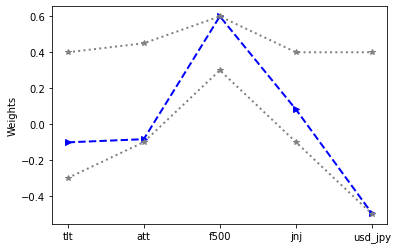

In [17]:
#plotting the weights
chart_weights(p1)

In [16]:
#calculating turnover of the portfolio
turnover(extract_weights(p1))

0.35999999485575185